# S&P 500 index price forecasting using Machine Learning

* **SheGoesTech - Final project** 
* 2022 November 
* *by Valerija Miribian*

![image info](https://assets.goldavenue.com/uploads/tag/og_image/1253/sp500.jpg)

# Introduction 

For a person who works in Financial Markets field and start getting to know Machine Learning methodology - Stock Price forecasting sounds one of the most interesting topics to try out.

**Stock price forecasting** based on artificial intelligence methods has recently became an increasingly evolving research topic. With the uncertainty prevailing in the financial markets in a rapidly changing world, new solutions are being sought that are able to incorporate as many known factors as possible which influence stock prices. 

With the development of information technology, stock forecasting in the traditional ways has been replaced by machine learning techniques, which has great potential for applicability in financial markets, especially in time series forecasting. 

**Machine learning**, as a significant part of AI, offers a wide range of models for time series prediction, however, as there are not many researches available and no single perfect algorithm exists which is able to accurately predict price changes, this topic still remains very relevant. 

* The Standard and Poor's 500, or simply the **S&P 500**, is a stock market index tracking the stock performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices, and normally reflects the stock market trends instantly. 

In this notebook, I am going to apply the theoretical knowledge I learned in "SheGoesTech" Python and Data Analysis course, perform **S&P index price data analysis and try to built machine learning alorithm that would allow to forecast price deviation.**

# Author's note

Please note that this is my first data analysis project, which might require many further improvements. 
While working on a notebook i used mainly official Python Libraries documentation, also, some ideas were collected from different forums. 

Analysis and models build within this notebook cannot be applied in real life due to missing data and limitations, which will be discussed in the further sections. 

Purpose of this work - to get more familiar with Machine Learning methodology, practice the data analytics and scikit-learn library. 

# Required libraries 

In this notebook the following libraries will be used: 

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **XGBoost** – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

# Problem definition 

For the purpose of this project assignment, I am pretending working on a personal task to develop a time-series model that predicts S&P 500 index price in order to make investment related decisions.

I will try to create a machine learning algorithm to predict if the stock price will increase tomorrow. If the algorithm says that the price will increase, I'll buy stock. If the algorithm says that the price will go down, I won't do anything. 

Time-series dataset is extracted from Yahoo Finance (https://finance.yahoo.com/quote/%5EGSPC?p=%5EGSPC), historical data of ^GSPC quote. 


TODO: **BONUS** - Try to predict continuous values (Adj.Close index price)

# STEP 1. Answering the questions

    - Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

I am trying to create time-series regression model, to predict the future price of S&P500 index, based on historical data from 2000-01-01. Measurements that will be provided into original dataset are: Date, Open, High, Low, Close, Volume, Adj Close. 

    - Did you define the metric for success before beginning?

I want to maximize my true positives - days when the algorithm predicts that the price will go up, and it actually goes go up. Therefore, I'll be using precision as my error metric for the algorithm, which is true positives / (false positives + true positives). **Aim for my beginning - to achieve at least 51% score - better than coin flip.** 

While analysing scikit-learn documentation i found that ROC vs AUC curve is valid measure to evaluate classification model when we have 0, 1 values: 
* ROC curve - An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
    * True Positive Rate
    * False Positive Rate

* AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.

**My goal - achieve at least slighly above 0.5**

    - Did you understand the context for the question and the scientific or business application?

I will try to create a machine learning algorithm to predict if the stock price will increase tomorrow. I will use those predictions in order to decide if i should buy S&P500, or not buy. 

    - Did you record the experimental design?

No, time-series data is extracted from Yahoo finance, which is reliable source and holds all stock market related historic information. 

    - Did you consider whether the question could be answered with the available data?

I am aware about the limitations that the model will have - the index price movement can be impacted by different external factors, such as market news, macroeconomic indicators etc. So, the current available data will answer my questions, however, to limited extend. More data and model improvements might be required further in order to achieve better precision. 



# STEP 2. Checking the data 

# 2.1 - Downloading the data 

I was impressed when i found out that Python offers Yahoo finance library and you can download the data of the selected stock directly. 

Installing Yahoo finance library: 
- pip install yfinance 

First, I'll download the data from Yahoo Finance. I'll save the data after downloading, so I don't have to re-download it every time. I will use data for a single stock (S&P 500) from 2000 to the present.

In [60]:
import yfinance as yf
import os
import json
import pandas as pd

DATA_PATH = "sp500_data.json"

if os.path.exists(DATA_PATH):
    # Read from file if we've already downloaded the data.
    with open(DATA_PATH) as f:
        sp500_hist = pd.read_json(DATA_PATH)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500_hist = sp500.history(period="max")

    # Save file to json in case we need it later.
    sp500_hist.to_json(DATA_PATH)

In [61]:
#Check the data 
sp500_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
-1325617200000,17.660000,17.660000,17.660000,17.660000,0,0,0
-1325271600000,17.760000,17.760000,17.760000,17.760000,0,0,0
-1325185200000,17.719999,17.719999,17.719999,17.719999,0,0,0
-1325098800000,17.549999,17.549999,17.549999,17.549999,0,0,0
-1325012400000,17.660000,17.660000,17.660000,17.660000,0,0,0


In [62]:
sp500_hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1668402000000,3977.969971,4008.969971,3956.399902,3957.250000,4561930000,0,0
1668488400000,4006.409912,4028.840088,3953.169922,3991.729980,5015310000,0,0
1668574800000,3976.820068,3983.090088,3954.340088,3958.790039,4165320000,0,0
1668661200000,3919.260010,3954.330078,3906.540039,3946.560059,4051780000,0,0
1668747600000,3966.389893,3979.889893,3935.979980,3965.340088,4037360000,0,0


In [63]:
sp500_hist.shape

(23837, 7)

Success! The data seems to be in a usable format.

Nice that we were able to collect recent data of SP500 index directly from Yahoo Finance library. 

We have extraced all data from year 1927, we can see that there are 23837 rows and 7 collumns: 

* Open - open price when market opens 
* High - highest price throughout the day 
* Low  - lowes price throughout the day
* Close  - close price when market closed 
* Volume - daily trading volume
* Dividends  - dividends amount 
* Stock Splits - stock splits volume 

First two things that i need to do before further analysis: 

1. Update my dataframe to have data from year 2000 only (it will be easier for me to work with it)
2. Drop Dividends and Stock Splits Columns as they are not relevant for further analysis 

In [18]:
sp500_hist.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [20]:
#dropping two last columns 
sp500_hist = sp500_hist[sp500_hist.columns[:-2]]

In [21]:
#check if ok 
sp500_hist.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


In [64]:
# collecting the data from year 2000
sp500_index = yf.download("^GSPC", start="2000-01-01", end="2022-11-20")
sp500_index.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [30]:
#save the data 
sp500_index.to_json("sp500_index.json")

One of the first things we should look for is missing data:

In [65]:
sp500_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5759 entries, 2000-01-03 to 2022-11-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5759 non-null   float64
 1   High       5759 non-null   float64
 2   Low        5759 non-null   float64
 3   Close      5759 non-null   float64
 4   Adj Close  5759 non-null   float64
 5   Volume     5759 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 314.9 KB


In [66]:
#double check
sp500_index.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Great. There are 5759 rows in total, and according to above table 5759 values are available, thus there is no missing data in my dataset. 

sp500_index contains data that is required for my further analysis (from year 2000 to the present), and seems to be in readable format, without missing data. 

# 2.2 - Checking the data 

In [67]:
sp500_index.describe() # summary statistics for numerical columns by default

,Open,High,Low,Close,Adj Close,Volume
count,5759.000000,5759.000000,5759.000000,5759.000000,5759.000000,5.759000e+03
mean,1863.584963,1874.691704,1851.533310,1863.768201,1863.768201,3.294293e+09
std,957.030886,961.912924,951.674600,957.087452,957.087452,1.526907e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1183.465027,1190.135010,1174.615051,1182.900024,1182.900024,1.966250e+09
50%,1428.349976,1437.650024,1419.439941,1428.319946,1428.319946,3.398150e+09
75%,2346.380005,2355.699951,2336.849976,2348.569946,2348.569946,4.157145e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [68]:
sp500_index[sp500_index['Close'] == sp500_index['Adj Close']].shape

(5759, 6)

In [69]:
#From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. 
# So, having redundant data in the dataset is not going to help
# we’ll drop this column before further analysis.

sp500_index = sp500_index.drop(['Adj Close'], axis=1)

In [70]:
sp500_index.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1225200000
2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1064800000
2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1014000000
2000-01-12,1438.560059,1442.599976,1427.079956,1432.250000,974600000
2000-01-13,1432.250000,1454.199951,1432.250000,1449.680054,1030400000


Good thing that weekends and bank holidays (when market was closed) are already excluded from the dataset, we do not need to worry about it further.

Let's check how price of SP500 changed over time, from 2000: 

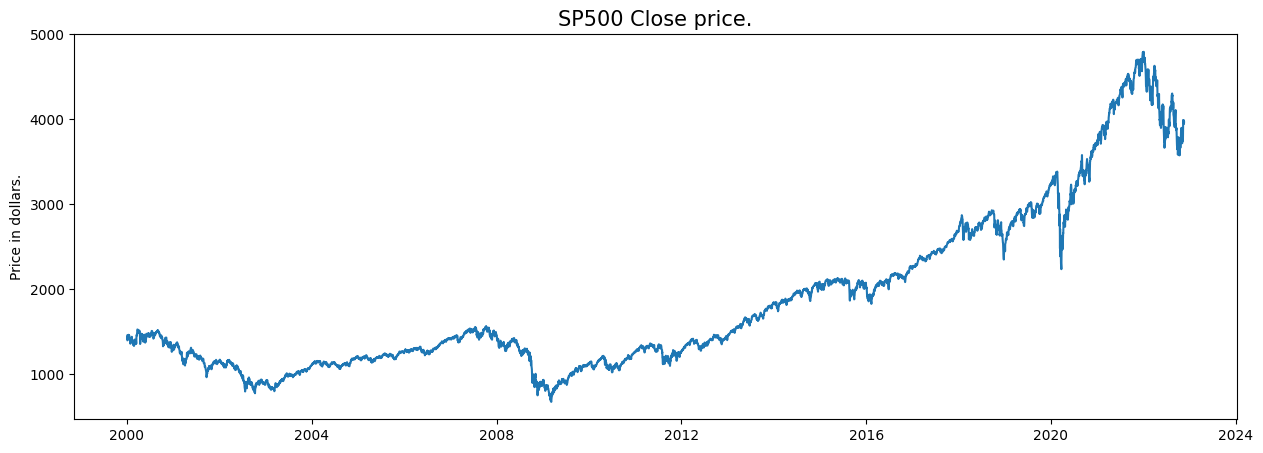

In [36]:
plt.figure(figsize=(15,5))
plt.plot(sp500_index['Close'])
plt.title('SP500 Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

Clearly, there is upward trend in index price. We can instantly observe the lowest point somewhere around 2009, after financial recession, then we have decrease in 2020, subject to Covid and Energy crisis. 

Apparently, this year we also see downward trend subject to recession, energy crisis, inflation, and uncertainty in the market. 

As we can see, above mentioned price drops happen due to external forces, thus we are at risk of precise and accurate predictions in short-period. However, let's try. 

I would also like to plot the whole history of SP500 prices, to check what i have dropped (till 2000): 

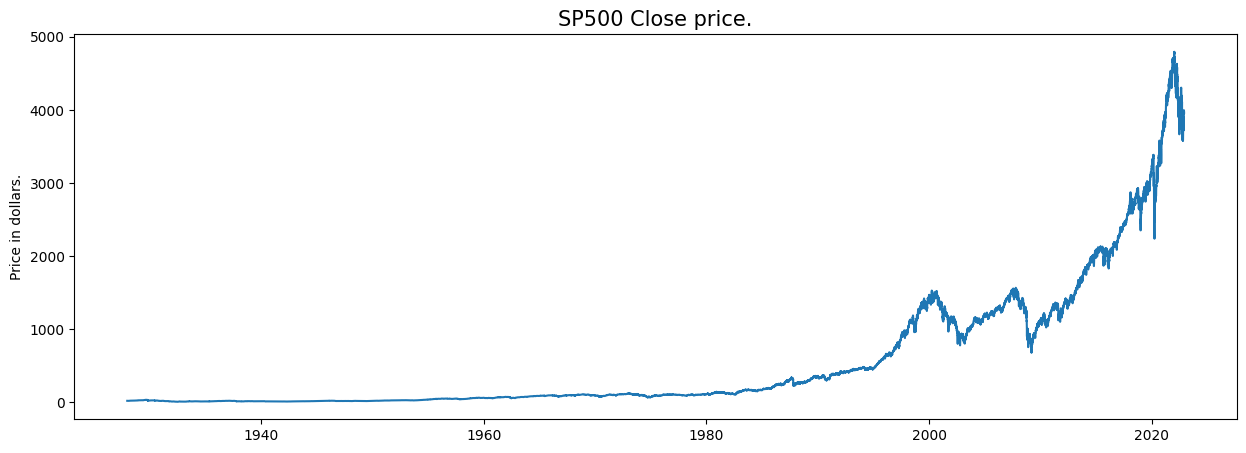

In [38]:
plt.figure(figsize=(15,5))
plt.plot(sp500_hist['Close'])
plt.title('SP500 Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

I can see that before 2000, no fluctuations occured, market was not that active these times, so removal of old dates should not have any substantial impact on my further modeling.

In [71]:
sp500_index.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-14,3977.969971,4008.969971,3956.399902,3957.250000,4561930000
2022-11-15,4006.409912,4028.840088,3953.169922,3991.729980,5015310000
2022-11-16,3976.820068,3983.090088,3954.340088,3958.790039,4165320000
2022-11-17,3919.260010,3954.330078,3906.540039,3946.560059,4051780000
2022-11-18,3966.389893,3979.889893,3935.979980,3965.340088,4037360000


In [72]:
sp500_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1225200000


In [79]:
#highest price since 2000
print(sp500_index[sp500_index.Close == sp500_index.Close.max()])

                   Open         High          Low        Close      Volume
Date                                                                      
2022-01-03  4778.140137  4796.640137  4758.169922  4796.560059  3831020000


Looks correct! SP500 is actually reached the record high on the first business day this year. 

In [80]:
#lowest price since 2000
print(sp500_index[sp500_index.Close == sp500_index.Close.min()])

                 Open       High         Low       Close      Volume
Date                                                                
2009-03-09  680.76001  695.27002  672.880005  676.530029  7277320000


Lowest price since 2020 was reached on 2009-03-09, which was during the recession time. 

In [90]:
sp500_index_price_min = sp500_index['Close'].min()
sp500_index_price_max = sp500_index['Close'].max()
print(f"{sp500_index_price_min} - This is the lowest price since 2000")
print(f"{sp500_index_price_max} - This is the highest price since 2000")
price_change = (sp500_index_price_max-sp500_index_price_min)/sp500_index_price_max*100
print(f"{price_change} - This is the percentace how value of SP500 changed over time")

676.530029296875 - This is the lowest price since 2000
4796.56005859375 - This is the highest price since 2000
85.89551634853876 - This is the percentace how value of SP500 changed over time


# 2.3 - Plotting the data

Next, let's create a scatterplot matrix. Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

In [39]:
sp500_index.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [41]:
sp500_index.describe()

,Open,High,Low,Close,Volume
count,5759.000000,5759.000000,5759.000000,5759.000000,5.759000e+03
mean,1863.584963,1874.691704,1851.533310,1863.768201,3.294293e+09
std,957.030886,961.912924,951.674600,957.087452,1.526907e+09
min,679.280029,695.270020,666.789978,676.530029,3.560700e+08
25%,1183.465027,1190.135010,1174.615051,1182.900024,1.966250e+09
50%,1428.349976,1437.650024,1419.439941,1428.319946,3.398150e+09
75%,2346.380005,2355.699951,2336.849976,2348.569946,4.157145e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,1.145623e+10


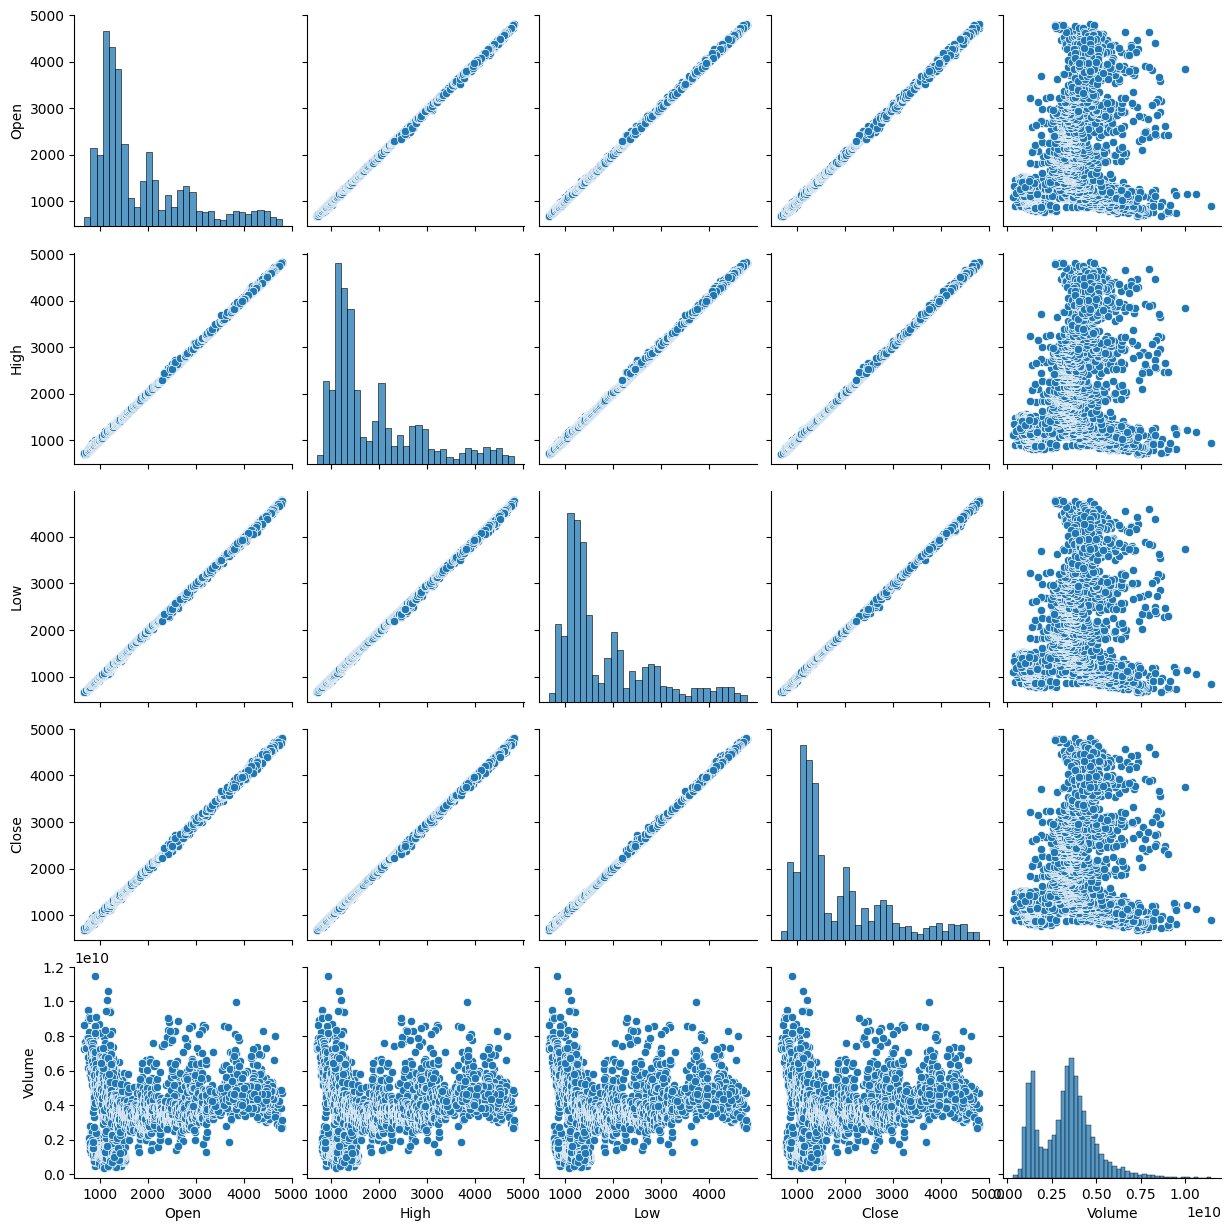

In [43]:
sb.pairplot(sp500_index)

Everything looks OK, i am unable to identify any significant outliers

Now let’s draw the distribution plot for the continuous features given in the dataset.

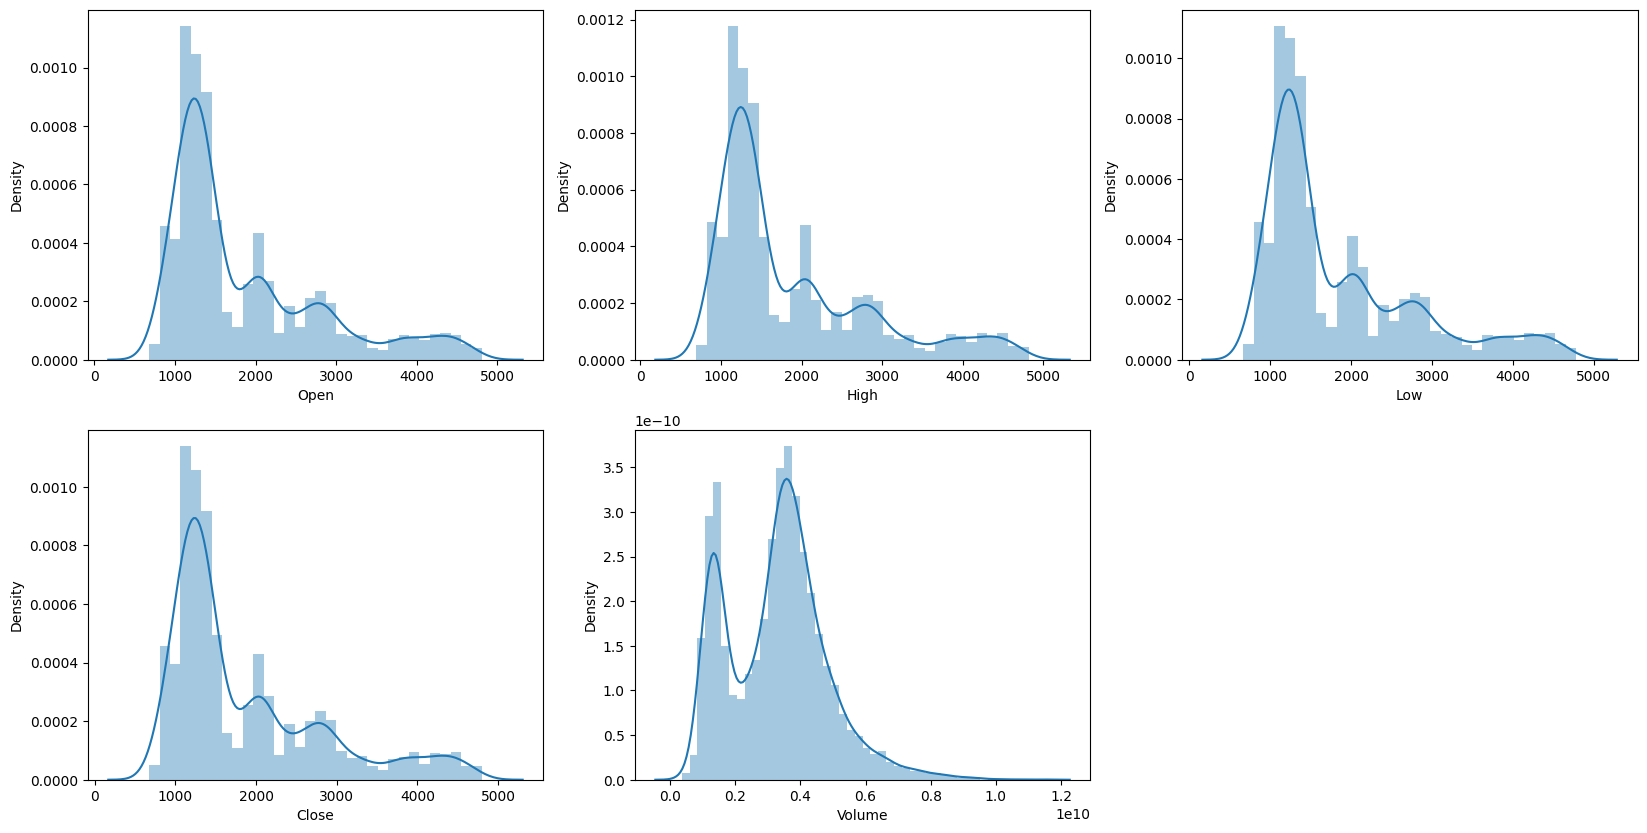

In [45]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(sp500_index[col])
plt.show()

In the distribution plot of SP500_index data, we can see one peak which means the data has varied significantly in one region. And the Volume data is right-skewed. Let's check it using boxplot:

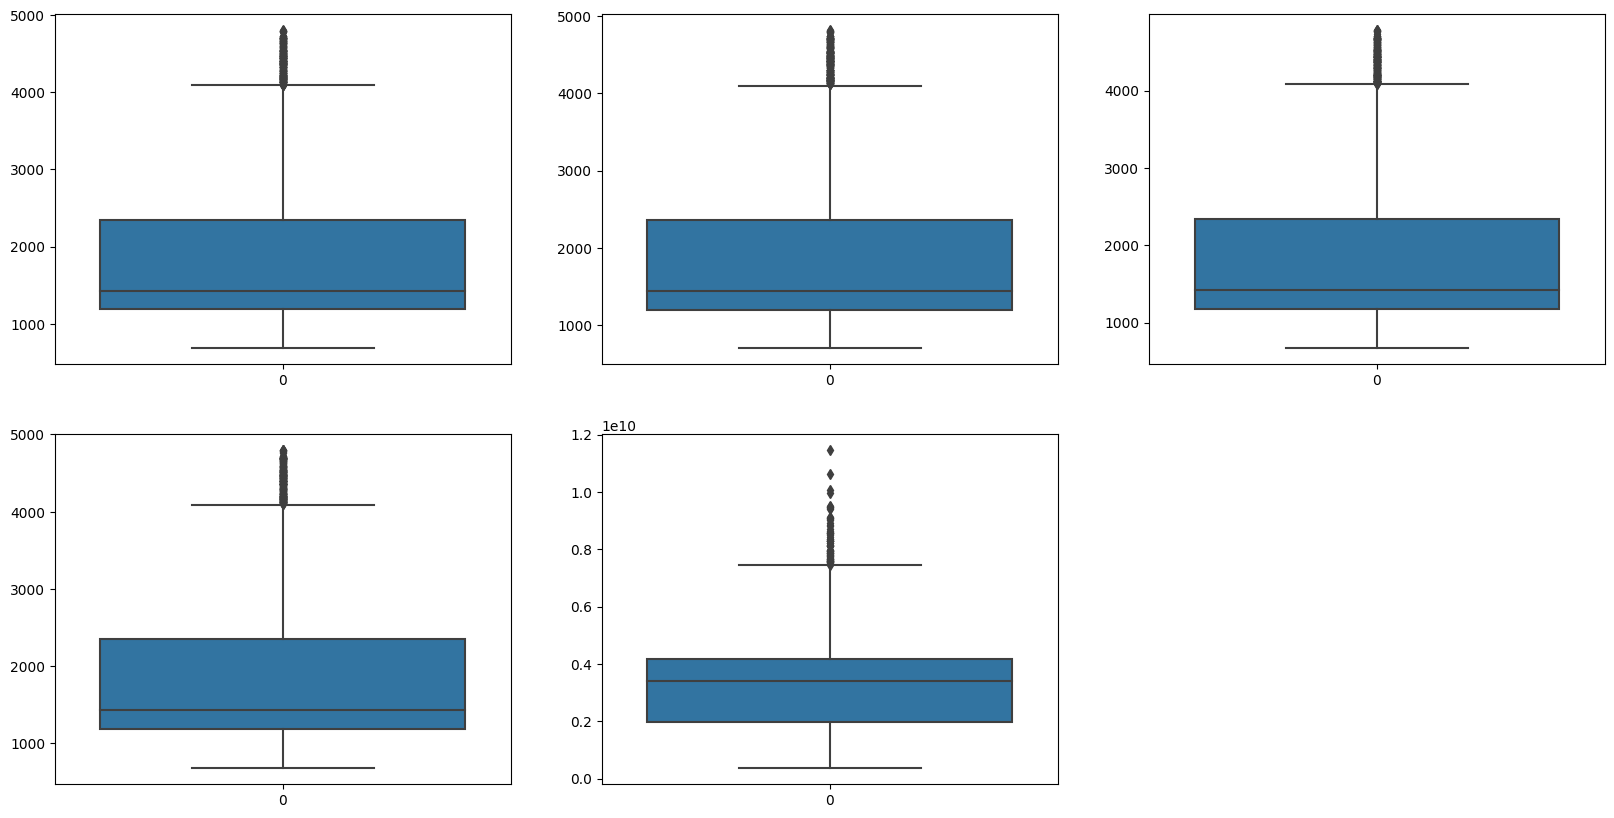

In [48]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(sp500_index[col])
plt.show()

array([[<AxesSubplot: title={'center': 'Volume'}>]], dtype=object)

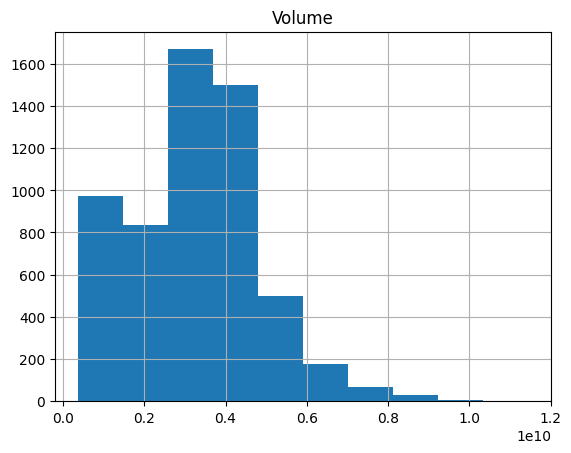

In [91]:
#plot histogram 
sp500_index.hist(column='Volume')

From the above boxplots and histogram, we can conclude that no outliers identified, data for all prices looks acceptable. 

Volume is not significant feature here, however, I would like to identify what drives such volume distribution and skewness. 

My first assumption - quarter end peaks (when companies publish their financial reports), however, let's check. 

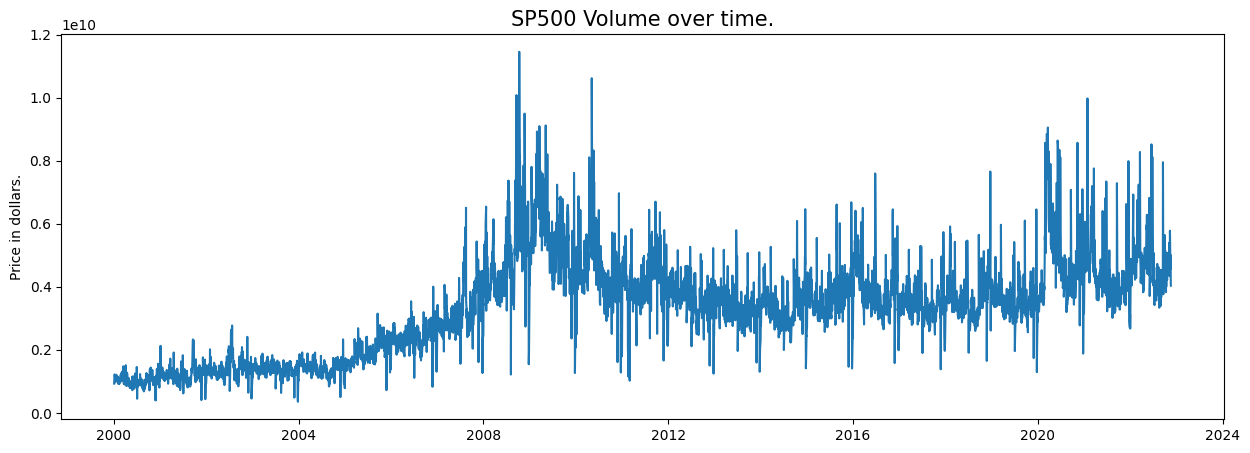

In [49]:
plt.figure(figsize=(15,5))
plt.plot(sp500_index['Volume'])
plt.title('SP500 Volume over time.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

Assumption looks correct - largest volumes observed on month ends and quarter ends. 

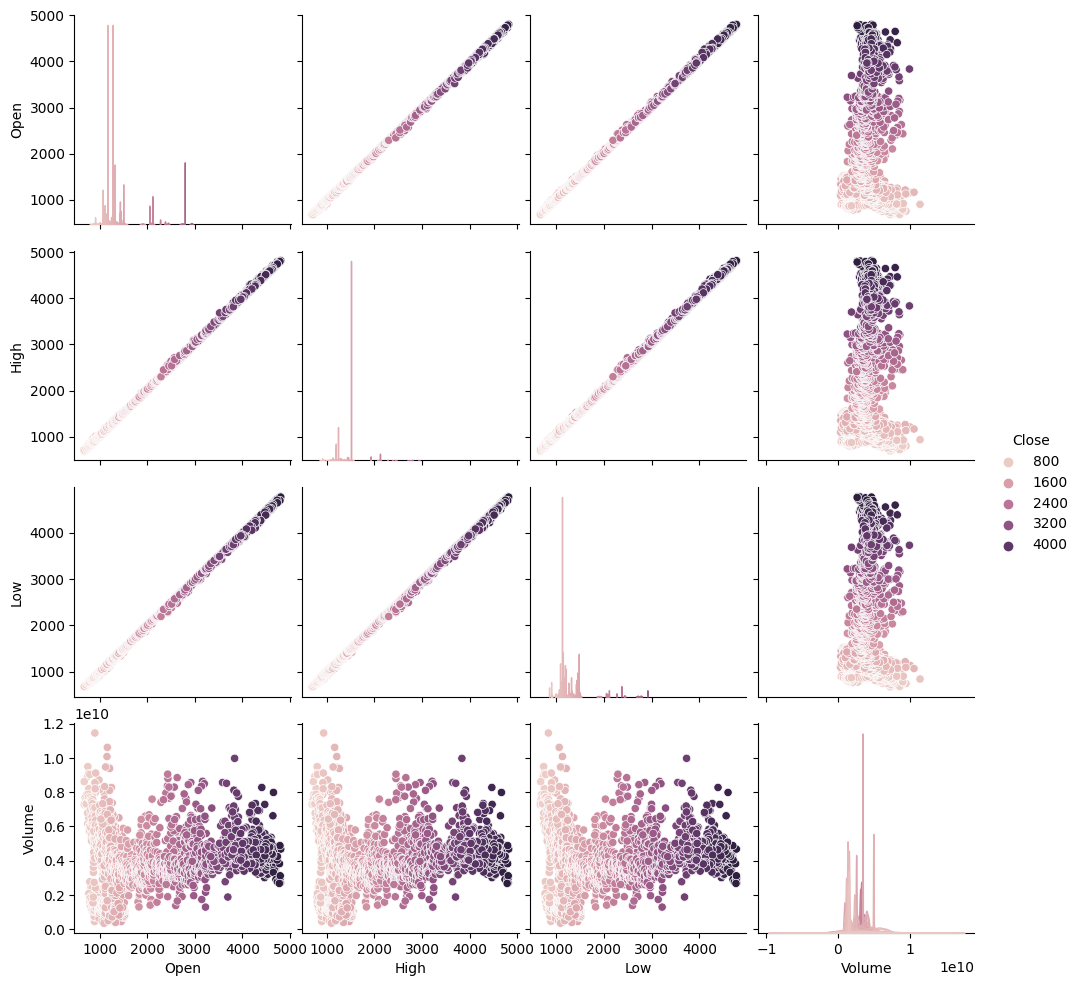

In [94]:
sb.pairplot(sp500_index, hue='Close')

**We are done with checking and preparing data part.**

The general takeaways are:

* Data is encoded correctly and saved in readable format

* Make sure your data falls within the expected range, and use domain knowledge whenever possible to define that expected range - *MAX and MIX values were identified, compared with actual values in Yahoo Finance page* 

* I was lucky - no missing data identified, thus nothing was dropped or replaced. 

* No manual changes were performed over the data 

* The record is available how data was tidied

* Plot everything you can about the data at this stage of the analysis so you can visually confirm everything looks correct

# STEP 3. Testing the data

We can quickly test our data using assert statements: We assert that something must be true, and if it is, then nothing happens and the notebook continues running. However, if our assertion is wrong, then the notebook stops running and brings it to our attention. 

In [98]:
sp500_index.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [99]:
#Let's test if our data has no missing values 
assert len(sp500_index.loc[(sp500_index['Open'].isnull()) |
                            (sp500_index['High'].isnull()) |
                            (sp500_index['Low'].isnull()) |
                            (sp500_index['Close'].isnull()) |
                            (sp500_index['Volume'].isnull())]) == 0

No error - great, we actually do not have any missing values 

Data was loaded and checked, initial analysis to identify if everything looks correct was performed. 

Data has been tested. 

Now, we are ready to move to Exploratory Data Analysis

# STEP 4. Exploratory data analysis

Below we have added some more columns which will help in the training of our model: 
* We have added the target feature which is a signal whether to buy or not - we will train our model to predict this only. 

But before proceeding let’s check whether the target is balanced or not using a pie chart.

In [100]:
sp500_index['Open-close'] = sp500_index['Open'] - sp500_index['Close']
sp500_index['Low-high'] = sp500_index['Low'] - sp500_index['High']

# Shift stock prices forward one day, so we're predicting tomorrow's stock prices from today's prices.
sp500_index['Target'] = np.where(sp500_index['Close'].shift(-1) > sp500_index['Close'], 1, 0)

In [101]:
sp500_index.head()

,Open,High,Low,Close,Volume,Open-close,Low-high,Target
Date,,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,931800000,14.030029,-39.640015,0
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,55.799927,-57.789917,1
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,-2.689941,-35.589966,1
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,-1.339966,-19.800049,1
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,-38.020020,-40.739990,1


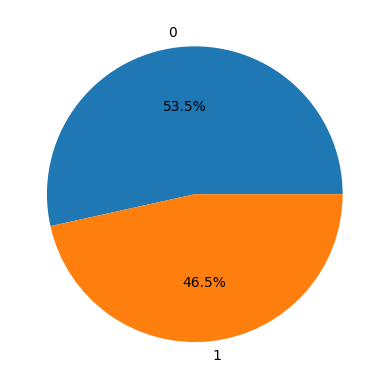

In [102]:
plt.pie(sp500_index['Target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

# How is my data distributed? 

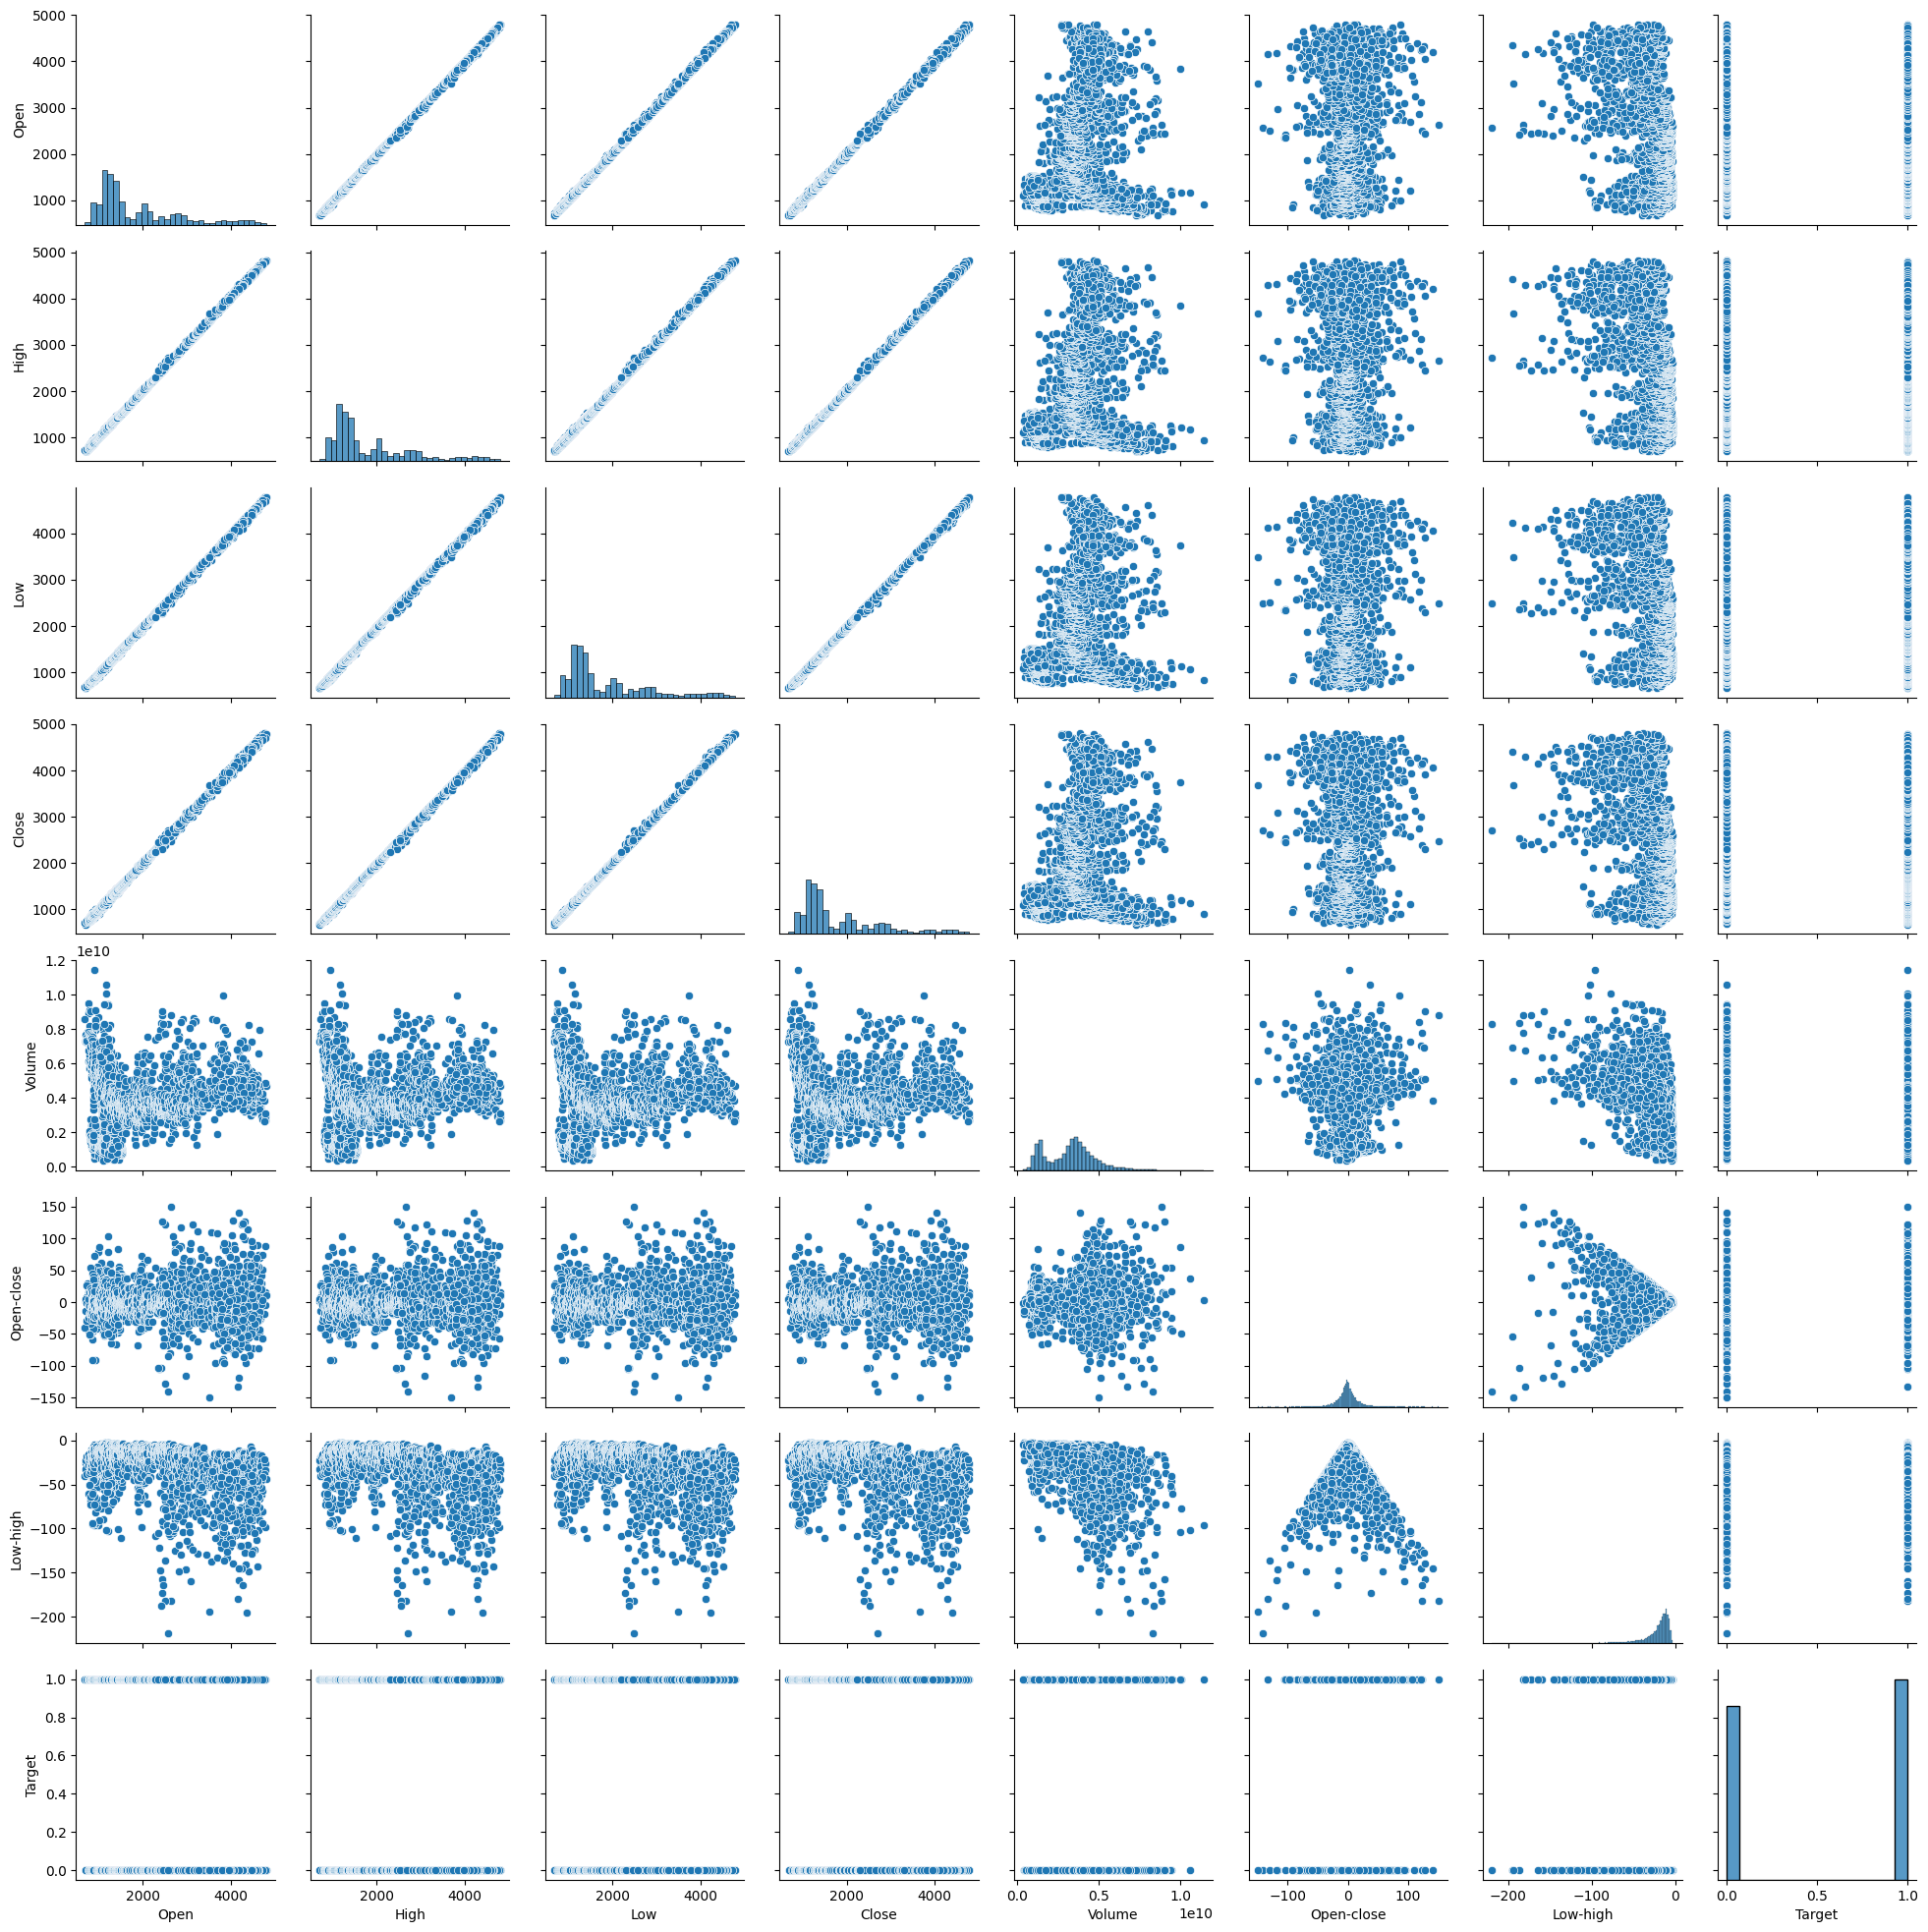

In [103]:
sb.pairplot(sp500_index)

Our data is normally distributed for the most part, which is great news if we plan on using any modeling methods that assume the data is normally distributed.

# Are there any correlations in my data?

When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

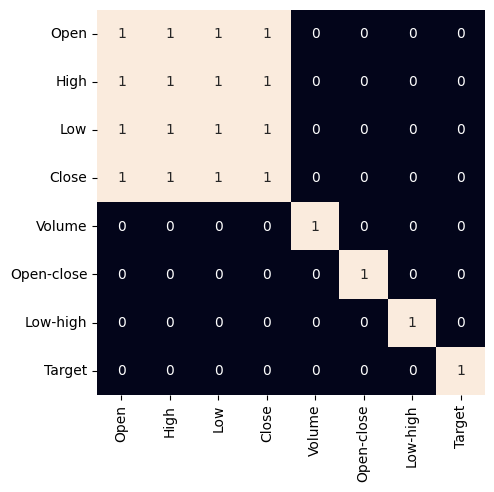

In [106]:
plt.figure(figsize=(5, 5))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(sp500_index.corr() > 0.9, annot=True, cbar=False)
plt.show()

From the above heatmap, we can say that there is a high correlation between Open, Close, Low, High, that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

**Great results!** 
We ensured that data is normally distributed, no correlations between predictor and features were identified. 

**We are good to go to the modeling part :)** 

# STEP 5. Data Splitting and Normalization

After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.

In [107]:
# defining features and target
features = sp500_index[['Open-close', 'Low-high']]
target = sp500_index['Target']
 
scaler = StandardScaler()
# built in module for normalization
features = scaler.fit_transform(features)
 
# Splitting the data
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(5183, 2) (576, 2)


Okay, we have 5183 rows for training and 576 rows for testing - Okay

# STEP 6. Model Development and Evaluation

Now is the time to train some machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

* **Logistic Regression** - Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

* **Support Vector Machine** - A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they're able to categorize new text.

* **XGBClassifier** - XGBoost (eXtreme Gradient Boosting) is a popular supervised-learning algorithm used for regression and classification on large datasets. It uses sequentially-built shallow decision trees to provide accurate results and a highly-scalable training method that avoids overfitting.

*P.S. I wanted to compare Logistic regression to SVM first, however, when analysing ML models, figured out that  XGBoost models are more stable and efficient than SVM algorithms, so tried to incorporate it into our analysis.*

# Evaluation 

For the evaluation metric, we will use the ROC-AUC curve, because instead of predicting the hard probability that is 0 or 1 we would like it to predict soft probabilities that are continuous values between 0 to 1. 

And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.

In [108]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5308258503381001
Validation Accuracy :  0.5307794722827403

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5284632638677945
Validation Accuracy :  0.5084483175986444

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) : 
Training Accuracy :  0.8988178837725368
Validation Ac

Among the three models, we have trained is Logistics Regression. XGB model has the highest training performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.

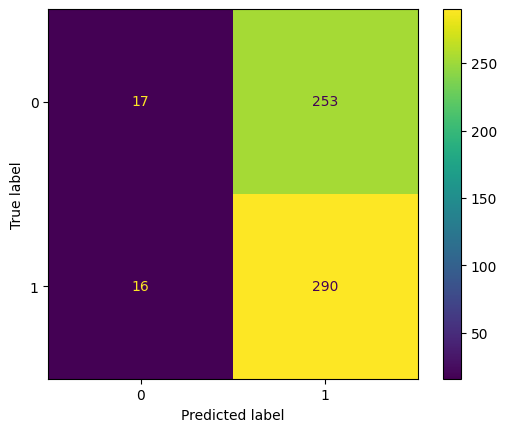

In [109]:
# plot confusion matrix
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

We can observe that the accuracy achieved by three ML models is slightly better than simply guessing with a probability of 50%. However, still requires improvements. 

Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.

# STEP 7. Model Improvement 

From these three models i would pic Logistics Regression for further analysis and improvement. 

# 7.1 Trying different train, test, splits

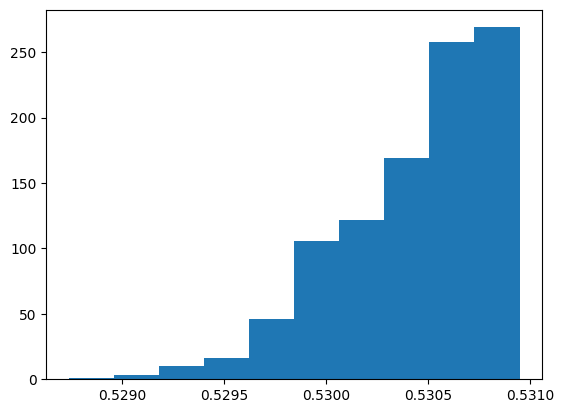

In [115]:
# here we randomly split data 1000 times in differrent training and test sets
model_accuracies = []
split_count = 1000

for _ in range(split_count):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(features, target, test_size=0.1)
    
    logistic_regression = LogisticRegression()
    logistic_regression.fit(training_inputs, training_classes)
    classifier_accuracy = metrics.roc_auc_score(target, logistic_regression.predict_proba(features)[:, 1])
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies) # we plot the list of accuracies
plt.show()

Unfortunately, the idea of improving the model by trying different training and testing set did not help. 

The highest accuracy that we could achieve with Logistic Regression model is 53%. 

# Summarizing results

So, we have tried using three Machine Learning models to predict our Target value, which we interpret as Buy(1), or Not Buy(0).
* Logistics regression - 53% Accuracy 
* Support Vector Classification - 50% Accuracy 
* XGBClassifier - 48% Accuracy 

**Logstic regression** model gave us the best result, we have tried to improve the model by splitting train/test sets differently, however, 53% accuracy was the hiighest we could achieve. 

At least, using the model is better than coin flip :) 

# Function of our Logistic regression model: 

*FYI see "Logistic_Regression.py" file*

In [185]:
def model_logistic_regression(df):
    #adding collumns
    df['Open-close'] = df['Open'] - df['Close']
    df['Low-high'] = df['Low'] - df['High']
    # Shift stock prices forward one day, so we're predicting tomorrow's stock prices from today's prices.
    df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
    #defining X and Y
    features = df[['Open-close', 'Low-high']]
    target = df['Target']
    #normalization
    scaler = StandardScaler()
    features = scaler.fit_transform(features)
    #splitting the data
    X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
    #modeling 
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    accuracy = metrics.roc_auc_score(target, model.predict_proba(features)[:, 1])
    print(accuracy)

# Next steps

**In this project, we have:**

* Downloaded data for a SP500 index - get to know Yahoo Finance library
* Cleaned and explored the data
* Created a machine learning models
* Tried to improve our best performed model

We now have a model that we can continue to build on. The biggest area we can improve is to continue to improve the accuracy of our predictions.

**There are a lot of next steps we could take:**

- Improve the technique
- Improve parameters
- Calculate earnings

However, in my opinion, the most important step for improvement is to add more predictors(features): 

    * Add in intraday trading day
    * Economic indicators
        * Interest rates
        * Other important economic news
    * Key dates
    * Dividends
    * External factors like elections
    * Financial data of major companier within index
    * Analyst ratings
    * Major announcements
    * Prices of related stocks/indexes
    * etc. 

# BONUS - Trying to predict continuos values

*I will try to predict Adj.Close Price*

For this, i will load my data again from Yahoo Finance, i already trust that data is normally distributed and there are no missing values.

As i am predicting continuos values i need to use Regression model - choosing **Random Forest Regressor.** 

Different evaluation metrics will be used. 

# Random Forest Regressor method

In [154]:
sp500data = yf.download("^GSPC", start="2000-01-01", end="2022-11-20")
sp500_df = pd.DataFrame(sp500_data)
sp500_df.to_csv("sp500_data.csv")

[*********************100%***********************]  1 of 1 completed


In [155]:
sp500_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [156]:
#read file and save "Date" as an index 
df = pd.read_csv("sp500_data.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

In [157]:
x = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,  random_state=0)

In [159]:
#We are scaling the x_train and x_test using the standard scaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

# Hyperparamater tuning

The hyperparameters in the random forest model are either used to increase the predictive power of the model or to make the model faster.

For a random forest regression model, the best parameters to consider are:

* n_estimators — number of trees in the forest
* max_depth — maximum depth in a tree
* min_samples_split — minimum number of data points before the sample is split
* min_samples_leaf — minimum number of leaf nodes that are required to be sampled
* bootstrap — sampling for data points, true or false
* random_state — generated random numbers for the random forest.

In [165]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END bootstrap=True, max_depth=8, min_samples_leaf=7, min_samples_split=2, n_estimators=100, random_state=30; total time=   1.6s
[CV] END bootstrap=True, max_depth=8, min_samples_leaf=7, min_samples_split=2, n_estimators=100, random_state=30; total time=   1.9s
[CV] END bootstrap=True, max_depth=8, min_samples_leaf=7, min_samples_split=2, n_estimators=100, random_state=30; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=100, random_state=2; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=100, random_state=2; total time=   2.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=100, random_state=2; total time=   2.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=7, min_samples_split=9, n_estimators=500, random_state=42; total time=  16.5s
[

RESULT that was printed: 
{'random_state': 1, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 12, 'bootstrap': False}

I will try to use those parameters in my model: 

In [166]:
# Making predictions
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=12, bootstrap=False)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[1118.29000419 1373.59997559 1079.39248657  953.46803253 1515.79998779
 2379.24343945 4350.3749668  1758.96731934 1409.68398437 3730.5229165
 1391.21749878 1122.3228411  1320.51000977 2039.68862964 4167.58984375
  878.40999349 1512.66497803  939.09667969 1433.33499146 1313.09399414
 3942.20542236 1539.88983984 1097.72503662 2049.77215259 1656.36290234
 3380.23300781 1402.04889594 1273.596639   1007.84002686 4005.46253027
  984.36401123 1248.17498779 1208.28503418 2438.63751221  838.11382434
 1092.83400879 1977.80004883 1134.42333984 2779.51629883 2407.80350586
 3942.55884277 1756.03170361 3799.4616792  1476.96674536 1191.52999878
 1062.73704541 1569.40619336 3273.717146   2584.70508789 4359.79159863
 1416.81166585 1111.21382275 2899.37865039 1367.57332357 1216.98140576
 2500.22998047 1389.66987891 2474.37098145  928.89001465 3370.98357178
 1210.24998256 1365.62802734 1827.91957031 1556.49944971 1003.30751038
 1486.77962061 1224.45748901 1419.63995361 1183.6275177  1139.28662109
 2572.0

In [172]:
num_predictions = predict.shape[0]

In [173]:
print(f"Model predicted values for the next {num_predictions} trading days.")

Model predicted values for the next 576 trading days.


# Statistical metrics and performance evaluation

Using standard maetrics for regression to evaluate the model:

In [175]:
def model_evaluation(model):
    print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
    print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
    print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
    print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
    print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
    errors = abs(predict - y_test)
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

In [176]:
model_evaluation(model)

Mean Absolute Error: 0.7311
Mean Squared Error: 2.451
Root Mean Squared Error: 1.5656
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Random Tree Regressor.
Accuracy: 99.96 %.


Not bad :) 

In [177]:
#saving my predictions
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")

In [179]:
predictions.head(20)

,Predictions
2022-11-18,1118.290004
2022-11-19,1373.599976
2022-11-20,1079.392487
2022-11-21,953.468033
2022-11-22,1515.799988
2022-11-23,2379.243439
2022-11-24,4350.374967
2022-11-25,1758.967319
2022-11-26,1409.683984
2022-11-27,3730.522917


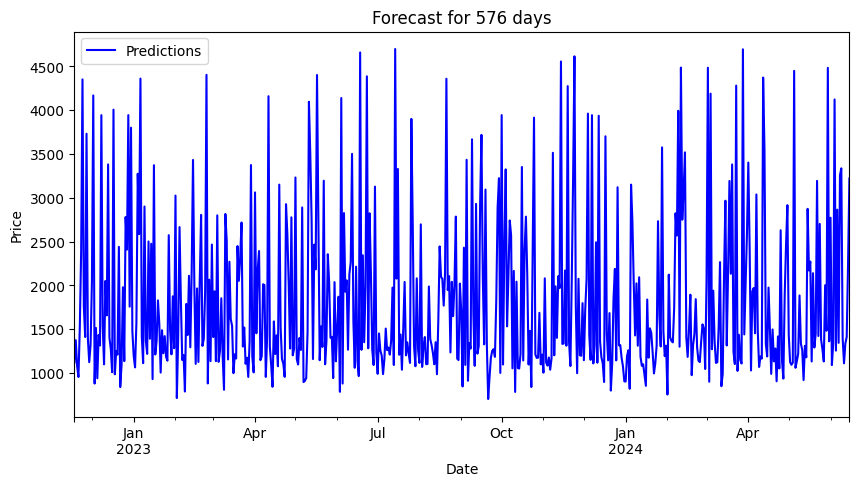

In [180]:
#let's plot predictions 
predictions["Predictions"].plot(figsize=(10, 5), title="Forecast for 576 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [181]:
predictions.head(50)

,Predictions
2022-11-18,1118.290004
2022-11-19,1373.599976
2022-11-20,1079.392487
2022-11-21,953.468033
2022-11-22,1515.799988
2022-11-23,2379.243439
2022-11-24,4350.374967
2022-11-25,1758.967319
2022-11-26,1409.683984
2022-11-27,3730.522917


Let's see if those predictions will turn into reality :) 

Now, as we know much more information about stock market than our model, we can assume that those predictions are not correct. Due to high inflation, energy prices and uncertainty around global recession stock market will probably experience downward trend, which will be reflected in SP500 index, as well. 

# Next steps

**In this project (Bonus Section), we have:**

* Downloaded data for a SP500 index
* Worked with time-series - tried to predict continuous values 
* Tried Regression model - Random Forest Regressor
* Tried to improve our model using Hyperparameters
* Evaluated our model 

We now have a model that we can continue to build on. The biggest area we can improve is to continue to improve the accuracy of our predictions. As for now model only takes SP500 historic prices into account, so, as we saw from the predictions, they will not be accurate due to many other external factors index depends on. 

**There are a lot of next steps we could take:**

- Improve the technique
- Improve parameters
- Add additional data (features):

        * Add in intraday trading day
        * Economic indicators
            * Interest rates
            * Other important economic news
        * Key dates
        * Dividends
        * External factors like elections
        * Financial data of major companier within index
        * Analyst ratings
        * Major announcements
        * Prices of related stocks/indexes
        * etc. 